In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.datasets import load_diabetes
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer

cancer_mama = load_breast_cancer()

df = pd.DataFrame(data=cancer_mama.data, columns=cancer_mama.feature_names)
y = cancer_mama.target

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0 )

In [11]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.9298245614035088


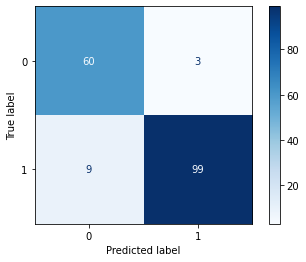

In [12]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [14]:
!pip install pydot

In [16]:
from IPython.display import Image
from six import StringIO
import pydot

dot_data = StringIO()
export_graphviz(arbol, out_file=dot_data, feature_names=df.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [22]:
# n_estimators = numero de arboles independientes (100 default)
forest = RandomForestClassifier(n_estimators = 1000)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

Score:  0.9590643274853801


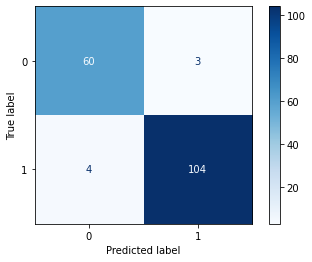

In [23]:
print('Score: ', forest.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);

In [51]:
# Importa el archivo CSV en un DataFrame
df1 = pd.read_csv('StudentsPerformance.csv')
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [52]:
df1['race/ethnicity'] = le.fit_transform(df1['race/ethnicity'])
df1['parental level of education'] = le.fit_transform(df1['parental level of education'])
df1 = df1.iloc[:,[0] + list(range(2, 8))]
df1.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,1,standard,none,72,72,74
1,female,4,standard,completed,69,90,88
2,female,3,standard,none,90,95,93
3,male,0,free/reduced,none,47,57,44
4,male,4,standard,none,76,78,75


In [56]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df1[['gender']])

X = df1.drop(columns=['gender'])
X = X.drop(columns=['lunch','test preparation course'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )
X.head()

,parental level of education,math score,reading score,writing score
0,1,72,72,74
1,4,69,90,88
2,3,90,95,93
3,0,47,57,44
4,4,76,78,75


In [57]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

y_pred = arbol.predict(X_test)

Score:  0.8233333333333334


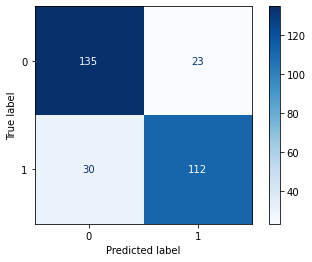

In [58]:
print('Score: ', arbol.score(X_test, y_test))

matriz_confusion = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matriz_confusion).plot(cmap=plt.cm.Blues);